# Descripción del proyecto
Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

# Descripción de los datos
Una base de datos con información sobre viajes en taxi en Chicago:
- tabla neighborhoods: datos sobre los barrios de la ciudad
    - name: nombre del barrio
    - neighborhood_id: código del barrio
    - tabla cabs: datos sobre los taxis
    - cab_id: código del vehículo
    - vehicle_id: ID técnico del vehículo
    - company_name: la empresa propietaria del vehículo
- tabla trips: datos sobre los viajes
    - trip_id: código del viaje
    - cab_id: código del vehículo que opera el viaje
    - start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
    - end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
    - duration_seconds: duración del viaje en segundos
    - distance_miles: distancia del viaje en millas
    - pickup_location_id: código del barrio de recogida
    - dropoff_location_id: código del barrio de finalización
- tabla weather_records: datos sobre el clima
    - record_id: código del registro meteorológico
    - ts: fecha y hora del registro (tiempo redondeado a la hora)
    - temperature: temperatura cuando se tomó el registro
    - description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

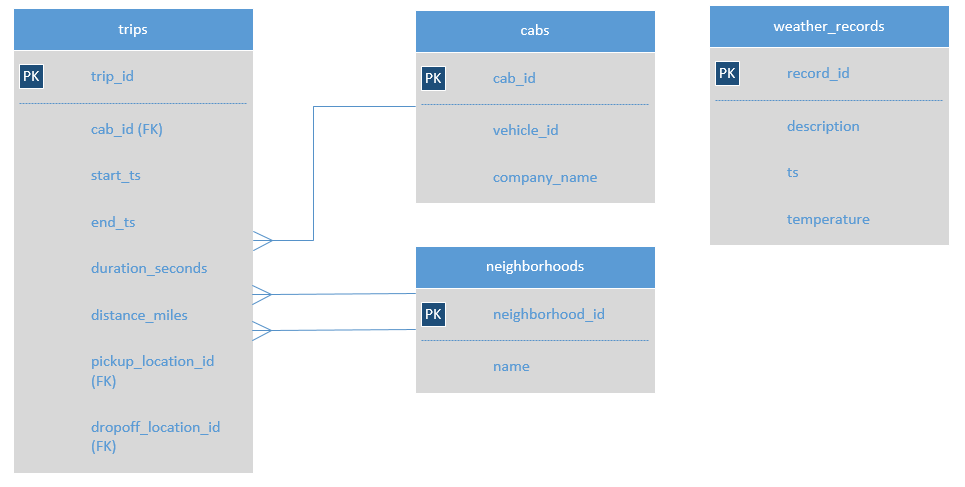

**Nota:** no existe una conexión directa entre las tablas trips y weather_records en la base de datos. Pero aún puedes usar JOIN y vincularlas usando la hora en la que comenzó el viaje (trips.start_ts) y la hora en la que se tomó el registro meteorológico (weather_records.ts).

# Instrucciones para completar el proyecto
### Paso 1.
Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:
https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html
### Paso 2. Análisis exploratorio de datos
- Encuentra el número de viajes en taxi para cada empresa de taxis del 15 al 16 de noviembre de 2017. Nombra el campo resultante trips_amount y muéstralo junto con el campo company_name. Ordena los resultados por el campo trips_amount en orden descendente.
- Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.
- En noviembre de 2017 las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Nombra el campo con nombres de empresas de taxis company. Ordena el resultado en orden descendente por trips_amount.
### Paso 3. Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
- Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.
- Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: "Bad" si el campo description contiene las palabras "rain" o "storm" y "Good" para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.
- Recupera de la tabla trips todos los viajes que comenzaron en el Loop (neighborhood_id: 50) y finalizaron en O'Hare (neighborhood_id: 63) un sábado. Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.
### Paso 4. Análisis exploratorio de datos (Python)
Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:
- project_sql_result_01.csv. Contiene los siguientes datos:
    - company_name: nombre de la empresa de taxis
    - trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
- project_sql_result_04.csv. Contiene los siguientes datos:
    - dropoff_location_name: barrios de Chicago donde finalizaron los viajes
    - average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
Para estos dos datasets ahora necesitas:
- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados
### Paso 5. Prueba de hipótesis (Python)
project_sql_result_07.csv: el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:
- start_ts: fecha y hora de recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

Prueba la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Establece el valor del nivel de significación (alfa) por tu cuenta.

Explica:
- cómo planteaste las hipótesis nula y alternativa
- qué criterio usaste para probar las hipótesis y por qué

### Parte 1
**Ejercicio 1**

Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:
[https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html)

El nombre del DataFrame debe ser weather_records y tienes que especificarlo cuando buscas: attrs={"id": "weather_records"} . Imprime el DataFrame completo.

In [ ]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

URL = 'https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html'
req = requests.get(URL)

soup=BeautifulSoup(req.text, 'lxml')

table = soup.find('table',attrs={"id": "weather_records"})

heading_table = []
for row in table.find_all(
    'th'
):
    heading_table.append(
        row.text
    )

content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])

weather_records = pd.DataFrame(content, columns=heading_table)
print(weather_records)

### Parte 2
**Ejercicio 1**

1.
Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.
Pista
Junta las tablas cabs y trips. Utiliza funciones de agregación y agrupación. No olvides introducir una condición.
Las primeras filas de la tabla resultante deberían ser así:

In [ ]:
SELECT
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    trips
    INNER JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) IN ('2017-11-15', '2017-11-16')
GROUP BY
    company_name
ORDER BY
    trips_amount DESC

**Ejercicio 2.**

Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

In [ ]:
SELECT
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    trips
    INNER JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND (cabs.company_name LIKE '%Yellow%' OR cabs.company_name LIKE '%Blue%')
GROUP BY
    company_name

**Ejercicio 3.**

Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

In [ ]:
SELECT
    CASE WHEN cabs.company_name = 'Flash Cab' THEN 'Flash Cab'
    WHEN cabs.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
    ELSE 'Other' END AS company,
    COUNT(trips.trip_id) AS trips_amount
FROM
    trips
    INNER JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY
    company
ORDER BY
    trips_amount DESC

**Ejercicio 4.**

Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

In [ ]:
SELECT
    neighborhoods.neighborhood_id,
    neighborhoods.name
FROM
    neighborhoods
WHERE
    name LIKE '%Hare' OR name LIKE 'Loop'

# Paso 4. Análisis exploratorio de datos (Python)
Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:
- /datasets/project_sql_result_01.csv. contiene los siguientes datos:
    - company_name: nombre de la empresa de taxis
    - trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
- /datasets/project_sql_result_04.csv. contiene los siguientes datos:
    - dropoff_location_name: barrios de Chicago donde finalizaron los viajes
    - average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Para  estos dos datasets ahora necesitas
- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

# Paso 5. Prueba de hipótesis (Python)
/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:
- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

## Prueba la hipótesis:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:
- cómo planteaste las hipótesis nula y alternativa
- qué criterio usaste para probar las hipótesis y por qué

# Paso 4. Análisis exploratorio de datos
Recuperamos datos importantes en el análisis que realizamos de las bases de datos con SQL. Ahora tenemos varias tablas, de las cuales vamos a trabajar con estos dos archivos:

/datasets/project_sql_result_01.csv, que contiene los siguientes datos:
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv que contiene los siguientes datos:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Los pasos que vamos a seguir son los siguientes
- Importar librerías y archivos
- Estudiar los datos que contienen
- Revisar de que los tipos de datos sean correctos
- Identificar los 10 principales barrios en términos de finalización del recorrido
- Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- Sacar conclusiones basadas en cada gráfico y explicar los resultados
- Prueba de hipótesis
- Conclusiones generales

Primero, vamos a importar las librerías

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

Ahora, vamos a echarle un primer vistazo para ver si identificamos algún problema. Llamaremos al primer DataFrame **ct** porque es el que contiene la información de company_name (c) y trips_amount (t), y al segundo **da** porque contiene la información de dropoff_location (d) y average_trips (a).

In [2]:
ct = pd.read_csv('/datasets/project_sql_result_01.csv')
da = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
ct.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
da.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Lo primero que apreciamos es que ct tiene un total de 64 registros, no tiene valores nulos y sus columnas tienen el tipo de datos correcto. En nuestra tabla da, podemos ver que tiene 94 registros, también sin valores nulos y con el tipo de datos correcto.

Veamos si existe algún valor duplicado utilizando los métodos duplicated y sum

In [7]:
ct.duplicated().sum()

0

In [8]:
da.duplicated().sum()

0

¡Perfecto! No tenemos valores ausentes, ni tipos de datos incorrectos ni información duplicada. Continuemos con nuestro análisis.

Comencemos identificando los 10 principales barrios en términos de finalización del recorrido, para lo que simplemente ordenaremos la tabla en forma descendente utilizando sort_values

In [9]:
da.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Ya sabemos cuales son los 10 principales barrios a los que se dirigen los pasajeros que utilizan la aplicación. Ahora, vamos a  verlo en un gráfico

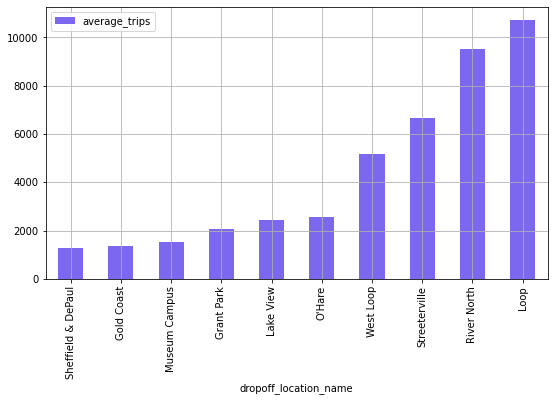

In [10]:
da_top_ten = da.query('average_trips > 1259')

da_plot = da_top_ten.pivot_table(
    index='dropoff_location_name',
    values='average_trips',
    aggfunc='sum').sort_values(by='average_trips')

da_plot.plot(kind='bar', grid=True, figsize=(9,5), color='mediumslateblue')
plt.show()

### Conclusiones

Podemos ver claramente que el barrio en el cual finalizaron la mayor cantidad de usuarios de la aplicación en el mes de noviembre del año 2017 fue Loop, seguido por River North, Streeterville y West Loop, todos con más de 4000 viajes.

Ahora, vamos a hacer un gráfico de las empresas de taxis que estudiamos y el número de viajes de cada una.

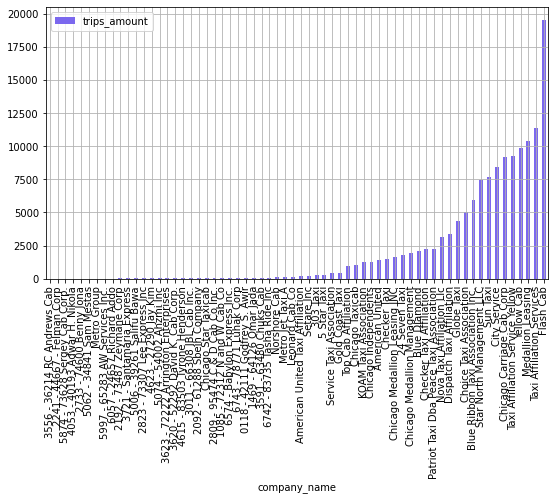

In [11]:
ct_plot = ct.pivot_table(
    index='company_name',
    values='trips_amount',
    aggfunc='sum').sort_values(by='trips_amount')

ct_plot.plot(kind='bar', grid=True, figsize=(9, 5), color='mediumslateblue')
plt.show()

Son demasiadas compañías para poder verlo con claridad en el gráfico. Para mejorarlo, hagamos lo siguiente, encontremos las 20 compañias con más viajes.

In [12]:
ct.sort_values(by='trips_amount', ascending=False).head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Hicimos el head con las 21 priemeras filas para poder ver el siguiente valor y así asegurarnos de que al hacer el query estemos tomando solo las filas que queremos.

Ahora, vamos a hacer una tabla con las 20 compañias que tienen mayor cantidad de viajes.

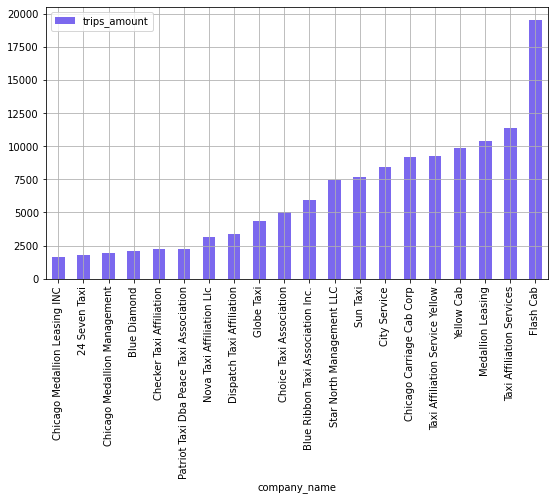

,trips_amount
count,20.000000
mean,6352.900000
std,4547.601206
min,1607.000000
25%,2230.250000
50%,5484.000000
75%,9210.500000
max,19558.000000


In [13]:
ct_top_twenty = ct.query('trips_amount >= 1607')

ct_plot = ct_top_twenty.pivot_table(
    index='company_name',
    values='trips_amount',
    aggfunc='sum').sort_values(by='trips_amount')

ct_plot.plot(kind='bar', grid=True, figsize=(9, 5), color='mediumslateblue')
plt.show()

ct_top_twenty.describe()

### Conclusión
La empresa con más viajes el 15 y 16 de noviembre del 2017 es, sin dudas, Flash Cab, con 19558 viajes.

Vemos también que la cantidad de viajes de esta empresa es llamativamente alta en comparación a las otras, ya que por poco duplica a su seguidora más cercana que es Taxi Afiliation Services.

La media de viajes por compañia es de 6352.9, mientras que la mediana es de 5484

# Paso 5. Prueba de hipótesis

En la tabla /datasets/project_sql_result_07.csv, tenemos el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Los valores de campo de la tabla son los siguientes:
- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

Probaremos la siguiente hipótesis:
- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Utilizaremos un nivel de significación alfa de 5%.

Lo primero que vamos a hacer es leer el archivo y echarle un vistazo

In [14]:
test = pd.read_csv('/datasets/project_sql_result_07.csv')
test.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


Ahora, vamos a crear dos tablas, una para el buen clima y otra para los días lluviosos. Revisaremos también la varianza de cada tabla

In [15]:
good_wheather = test.query('weather_conditions == "Good"')
bad_wheather = test.query('weather_conditions == "Bad"')

In [16]:
good_wheather_var = np.var(good_wheather)
good_wheather_var

duration_seconds    575732.93085
dtype: float64

In [17]:
bad_wheather_var = np.var(bad_wheather)
bad_wheather_var

duration_seconds    517403.563302
dtype: float64

Podemos ver que las varianzas de las tablas no son iguales. Con esta información, podemos seguir adelante con nuestra prueba de hipótesis.

La hipótesis nula es que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos a los sábados que tienen buen clima. Por lo tanto, la hipótesis alternativa es que La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no es igual los sábados lluviosos que los sábados con buen clima.

Formulamos la hipótesis nula y alternativa estructurándolas como hipótesis sobre la igualdad de las medias de dos poblaciones, ya que lo que buscamos hacer es comparar las medias de dos poblaciones estadísticas diferentes (en este caso, la duración media de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare en días lluviosos contra los días que no llueve.) Lo que buscamos estudiar es si la diferencia entre las medias es significativa o no, para decidir si rechazar o no la hipótesis nula.

Utilizaremos el método scipy.stats.ttest_ind(array1, array2, equal_var), estableciendo el parámetro equal_var en False, ya que las varianzas de las tablas no son iguales.

In [18]:
good_wheather_rate = good_wheather['duration_seconds']
bad_wheather_rate = bad_wheather['duration_seconds']

print('La duración promedio de los viajes en los días con buen clima es:', pd.Series(good_wheather_rate).mean())
print('La duración promedio de los viajes en los días lluvios es:', pd.Series(bad_wheather_rate).mean())

alpha = 0.05

results = st.ttest_ind(good_wheather_rate, bad_wheather_rate, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

La duración promedio de los viajes en los días con buen clima es: 1999.6756756756756
La duración promedio de los viajes en los días lluvios es: 2427.2055555555557
p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula


Observamos que el p-valor resultante es está por debajo de alpha, siendo de 6.73 a la -12. Por tal motivo rechazamos la hipótesis nula. Como conclusión, la duración promedio de los viajes en los sábados con buen clima y los sábados lluviosos no son iguales.

# Concusiones generales
- El barrio en el cual finalizaron la mayor cantidad de viajes en promedio durante el mes de noviembre del año 2017 fue Loop.
- Los 10 principales barrios en términos de finalización del recorrido, ordenados de forma descandente son:
    - Loop con 10727.46 viajes en promedio
    - River North con 9523.66 viajes en promedio
    - Streeterville con	6664.66 viajes en promedio
    - West Loop con	5163.66 viajes en promedio
    - O'Hare con 2546.90 viajes en promedio
    - Lake View	2420.96 viajes en promedio
    - Grant Park con 2068.53 viajes en promedio
    - Museum Campus con	1510.00 viajes en promedio
    - Gold Coast con 1364.23 viajes en promedio
    - Sheffield & DePaul con 1259.76 viajes en promedio
- La empresa con más viajes el 15 y 16 de noviembre del 2017 es Flash Cab, con 19558 viajes.
- La cantidad de viajes de Flash Cab es llamativamente alta en comparación a las otras.
- La media de viajes por compañia durante el mes de Noviembre del 2017 es de 6352.9, mientras que la mediana es de 5484